# Misura indice rifrazione aria

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
from jax import grad
from jax import numpy as jnp

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from giopy import Interpolazione, final_val
from interpolazione import Interpolazione as LinearInterpolation

sys.path.append(dir_path)

In [5]:
ΔN = np.array([6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18])
ΔP = np.array([-30, -35, -45, -50, -55, -60, -65, -70, -75, -80, -85]) * 10**3 # kpa

sigmaP = 2000

   
Parameters: {'A': -4674.540682316116} 
Sigma parameters: {'A': 38.400035756449235}

sigmaY: 2000

chiquadro ridotto: 0.58
df: 10
pvalue: 100.0%
covariance matrix: [[1218.6468976]]    



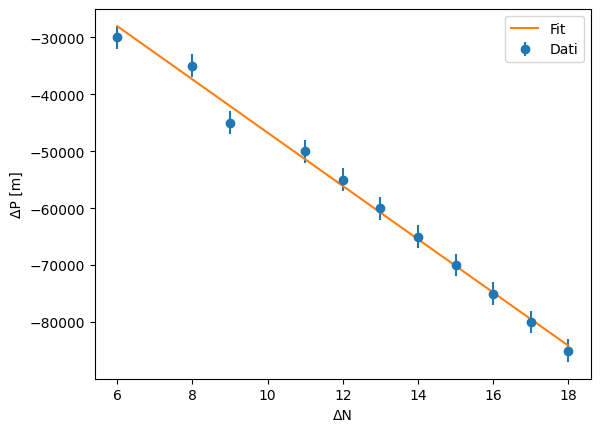

In [6]:
plt.errorbar(ΔN, ΔP, yerr=sigmaP, fmt='o', label='Dati')

fit = LinearInterpolation(ΔN, ΔP,lambda x,A: x*A, sigmaP,p0=[1],names='A')
print(fit)

plt.plot(fit.x_best, fit.y_best, label='Fit')
plt.xlabel('ΔN')
plt.ylabel('ΔP [m]')
plt.legend()
plt.show()